In [55]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [56]:
# Import data

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [57]:
# Check the shapes
print(f"Shapes of X_train, y_train, X_test, y_test : ",(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shapes of X_train, y_train, X_test, y_test :  ((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))


In [58]:
# Create validation datasets (10,000)

X_val = X_train[:10000]
y_val = y_train[:10000]
X_val.shape

(10000, 32, 32, 3)

In [59]:
X_train = X_train[10000:50000]
y_train = y_train[10000:50000]
X_train.shape

(40000, 32, 32, 3)

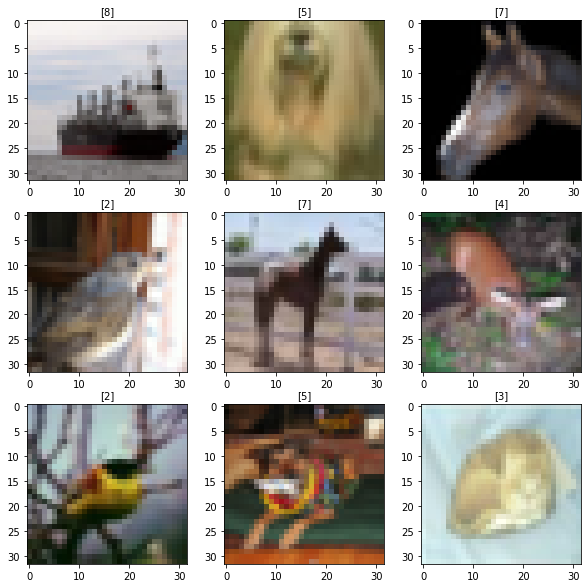

In [60]:
import random

obj_letters = {0 : "Aeroplane", 1 : "Automobile", 2 : "Bird", 3 : "Cat", 4 : "Deer", 5 : "Dog", 6 : "Frog", 7 : "Horse", 8 : "Ship",
               9 : "Truck"}

plt.figure(figsize = (10,10))

for i in range(9):
    indx = random.randint(0, X_train.shape[0])
    
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indx], cmap = 'gray')
    plt.title(y_train[indx], fontdict = {'color' : 'Black', 'fontsize' : 10})
plt.show()

In [61]:
y_train[2]

array([6], dtype=uint8)

In [62]:
# One-hot coding

y_train =  tf.keras.utils.to_categorical(y_train) 
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

In [63]:
# Create a model

model = Sequential()

model.add(ResNet50(include_top = False, input_tensor = None, input_shape = (32,32,3), pooling = 'avg', 
                  classes = 10, weights = 'imagenet'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'sigmoid'))

model.layers[0].trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [64]:
# Compile the model

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [65]:
# Train the model

model.fit(X_train, y_train, batch_size = 300, validation_data = (X_val, y_val),  epochs = 3, shuffle = True)

Epoch 1/3
134/134 [==============================] - 677s 5s/step - loss: 1.9567 - accuracy: 0.3641 - val_loss: 1.2507 - val_accuracy: 0.5762
Epoch 2/3
134/134 [==============================] - 682s 5s/step - loss: 1.3351 - accuracy: 0.5280 - val_loss: 1.1344 - val_accuracy: 0.6038
Epoch 3/3
134/134 [==============================] - 646s 5s/step - loss: 1.2038 - accuracy: 0.5755 - val_loss: 1.1035 - val_accuracy: 0.6107


In [66]:
# Test the model

y_pred = model.predict(X_test)

In [67]:
accuracy = tf.keras.metrics.CategoricalAccuracy()

In [68]:
accuracy(y_pred, y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6089>

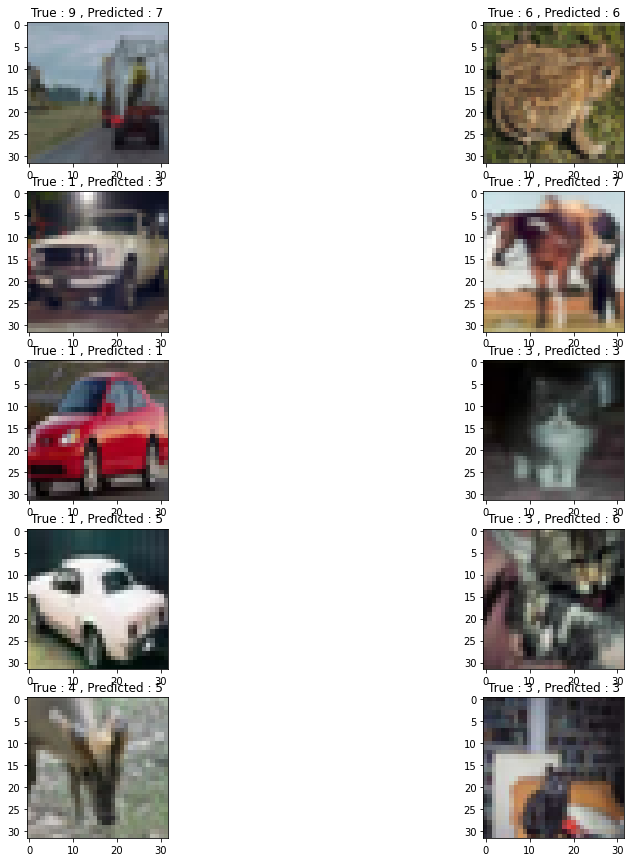

In [71]:
plt.figure(figsize = (15,15))
for i in range(10):
  ind = np.random.randint(0,len(X_test))
  plt.subplot(5,2,i+1)
  plt.imshow(X_test[ind] ,cmap = 'gray')
  plt.title('True : {} , Predicted : {}'.format(np.argmax(y_test[ind]), np.argmax(y_pred[ind])))
                                                                    
                                                                            
plt.show()
    